In [11]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os
import wesanderson
from labellines import labelLine, labelLines
import pandas as pd

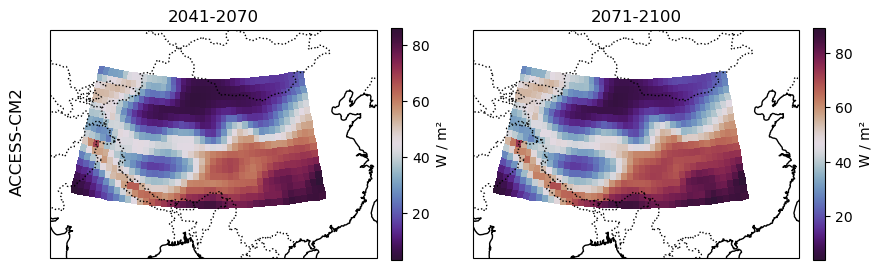

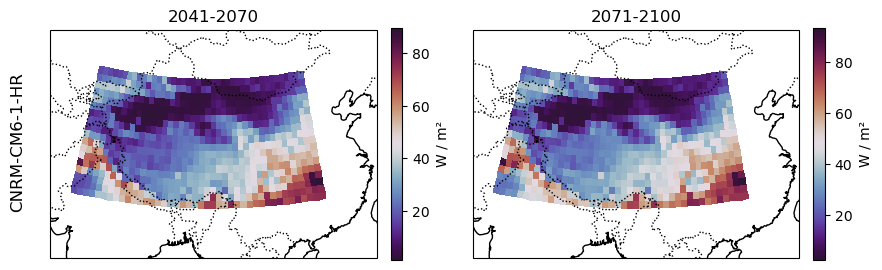

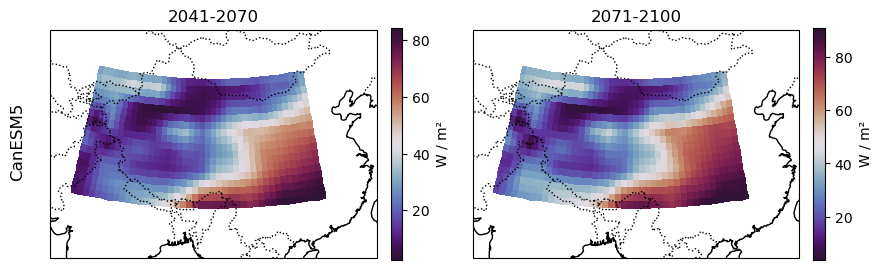

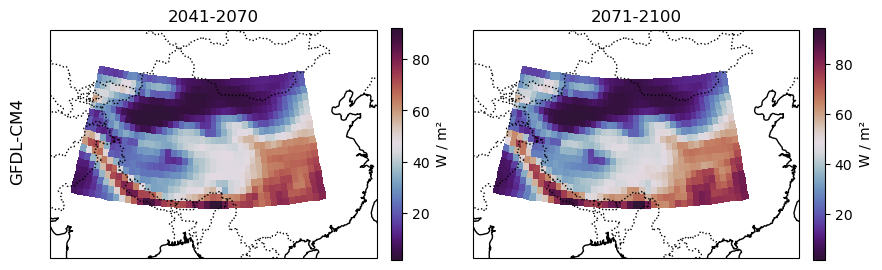

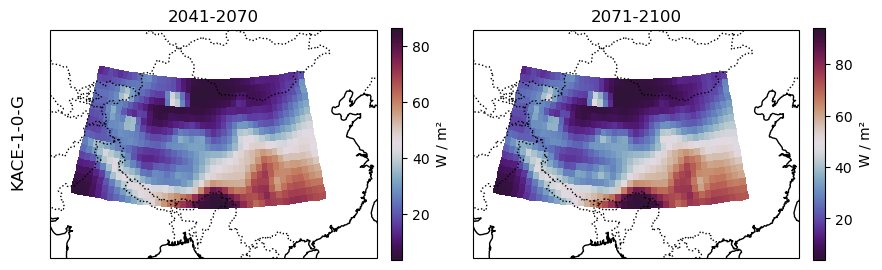

In [24]:
# File paths
file_paths_70 = [f for f in os.listdir(".") if f.endswith('70_tm')]
file_paths_70 = sorted(file_paths_70)
file_paths_100 = [f for f in os.listdir(".") if f.endswith('100_tm')]
file_paths_100 = sorted(file_paths_100)
# Model names
models = ["ACCESS-CM2", "CanESM5", "CNRM-CM6-1-HR", "GFDL-CM4", "KACE-1-0-G"]
models = sorted(models)

# Iterate over pairs of file paths
for i in range(len(file_paths_70)):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), 
                             subplot_kw={'projection': ccrs.AlbersEqualArea(central_longitude=95, central_latitude=35)})
    # Assumes that file_paths are in the correct order: first file of the pair is for 2041-2070, second is for 2071-2100
    # Open the dataset
    data = xr.open_dataset(file_paths_70[i], decode_times=False)
    data1 = xr.open_dataset(file_paths_100[i], decode_times=False)

    # Plotting
    image = data.hfls.plot(ax=axes[0], transform=ccrs.PlateCarree(), add_colorbar=False, cmap = "twilight_shifted")
    image1= data1.hfls.plot(ax=axes[1], transform=ccrs.PlateCarree(), add_colorbar=False, cmap = "twilight_shifted")
    # Add colorbar
    cbar = plt.colorbar(image, ax=axes[0], orientation='vertical', fraction=0.033, pad=0.04)
    cbar.set_label('W / m²')
    cbar1 = plt.colorbar(image1, ax=axes[1], orientation='vertical', fraction=0.033, pad=0.04)
    cbar1.set_label('W / m²')
    # Setting extent
    axes[0].set_extent([70, 120, 20, 50], crs=ccrs.PlateCarree())
    axes[1].set_extent([70, 120, 20, 50], crs=ccrs.PlateCarree())

    # Adding features
    axes[0].add_feature(cfeature.BORDERS, linestyle=':')
    axes[0].add_feature(cfeature.COASTLINE)

    # Adding features
    axes[1].add_feature(cfeature.BORDERS, linestyle=':')
    axes[1].add_feature(cfeature.COASTLINE)
    axes[0].set_title('2041-2070', fontsize=12)
    axes[1].set_title('2071-2100', fontsize=12)

    # Add model name to the left side of the pair
    plt.text(0.1, 0.5, models[i], transform=fig.transFigure, ha='right', va='center', 
             rotation='vertical', fontsize=12)

    # plt.tight_layout()
    plt.show()


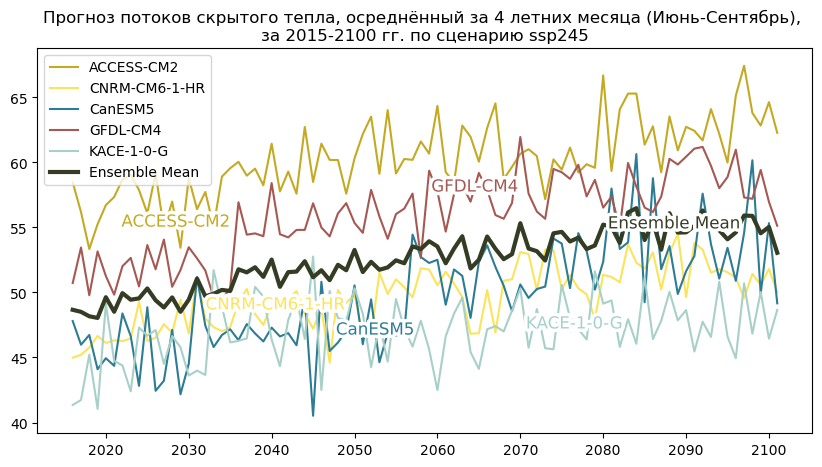

In [50]:
file_paths_245 = sorted([f for f in os.listdir(".") if f.endswith('245_fm_JJAS')])
colors = wesanderson.film_palette('The French Dispatch')
# Model names
models = sorted(["ACCESS-CM2", "CanESM5", "CNRM-CM6-1-HR", "GFDL-CM4", "KACE-1-0-G"])
mock_time = pd.date_range(start='2015', periods=86, freq='Y').tolist()
fig, ax = plt.subplots(figsize=(10, 5))

data_245 = []
for i in range(len(file_paths_245)):
    data = xr.open_dataset(file_paths_245[i], decode_times = False)
    ensmean = xr.open_dataset('cmip6_hfls_Tibet_ensmean_245.nc', decode_times = False)
    data_245.append(data)
    # Plotting
    ax.plot(mock_time, data.hfls.values.flatten() , color = colors[i], label = models[i])

ax.plot(mock_time, ensmean.hfls.values.flatten() , color = colors[5], label = 'Ensemble Mean', linewidth = 3)
plt.title("Прогноз потоков скрытого тепла, осреднённый за 4 летних месяца (Июнь-Сентябрь), \nза 2015-2100 гг. по сценарию ssp245")
labelLines(plt.gca().get_lines(), fontsize=12, align=False)
plt.legend()
# plt.tight_layout()
plt.show()

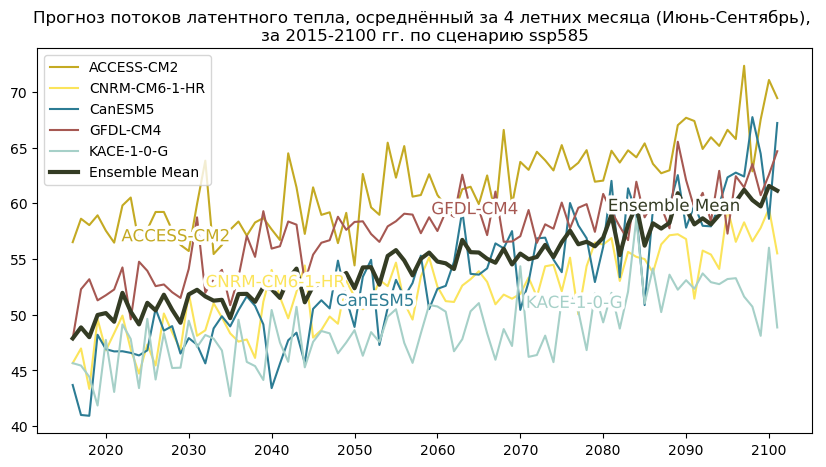

In [37]:
file_paths_585 = sorted([f for f in os.listdir(".") if f.endswith('585_fm_JJAS')])
colors = wesanderson.film_palette('The French Dispatch')
# Model names
models = sorted(["ACCESS-CM2", "CanESM5", "CNRM-CM6-1-HR", "GFDL-CM4", "KACE-1-0-G"])
mock_time = pd.date_range(start='2015', periods=86, freq='Y').tolist()
fig, ax = plt.subplots(figsize=(10, 5))

data_585 = []
for i in range(len(file_paths_585)):
    data = xr.open_dataset(file_paths_585[i], decode_times = False)
    data_585.append(data)
    ensmean = xr.open_dataset('cmip6_hfls_Tibet_ensmean_585.nc', decode_times = False)
    # Plotting
    ax.plot(mock_time, data.hfls.values.flatten() , color = colors[i], label = models[i])

ax.plot(mock_time, ensmean.hfls.values.flatten() , color = colors[5], label = 'Ensemble Mean', linewidth = 3)
plt.title("Прогноз потоков скрытого тепла, осреднённый за 4 летних месяца (Июнь-Сентябрь), \nза 2015-2100 гг. по сценарию ssp585")
labelLines(plt.gca().get_lines(), fontsize=12, align=False)
plt.legend()
# plt.tight_layout()
plt.show()

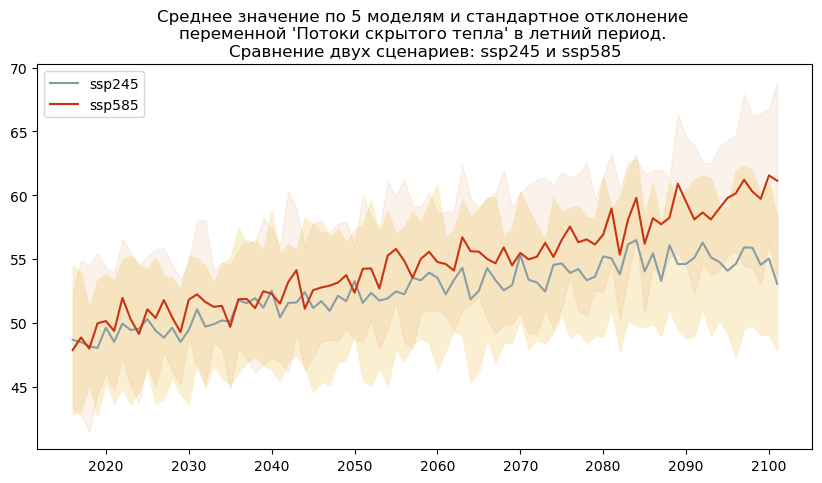

In [57]:
file_paths = sorted([f for f in os.listdir(".") if f.startswith('cmip6')])
colors = wesanderson.film_palette('The Royal Tenenbaums')
scenarios = ['ssp245', 'ssp585']
# Model names
mock_time = pd.date_range(start='2015', periods=86, freq='Y').tolist()

fig, ax = plt.subplots(figsize=(10, 5))
d245 = xr.open_dataset(file_paths[0], decode_times = False).hfls.values.flatten() 
d585 = xr.open_dataset(file_paths[1], decode_times = False).hfls.values.flatten() 
std_array_245 = xr.open_dataset(file_paths[2], decode_times = False).hfls.values.flatten() 
std_array_585 = xr.open_dataset(file_paths[3], decode_times = False).hfls.values.flatten()

for i in range(len(file_paths)-2):
    data = xr.open_dataset(file_paths[i], decode_times = False)
    # Plotting
    ax.plot(mock_time, data.hfls.values.flatten() , color = colors[i], label = scenarios[i])

plt.title("Среднее значение по 5 моделям и стандартное отклонение \nпеременной 'Потоки скрытого тепла' в летний период. \nСравнение двух сценариев: ssp245 и ssp585")
# labelLines(plt.gca().get_lines(), fontsize=12, align=False)
plt.fill_between(mock_time, d245 - std_array_245, d245 + std_array_245, color=colors[2], alpha=1)
plt.fill_between(mock_time, d585 - std_array_585, d585 + std_array_585, color=colors[3], alpha=0.1)
plt.legend(loc = 'upper left')
# plt.tight_layout()
plt.show()